# Logistic Regression - Abdullah Chaudhry

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

mainfile = pd.read_csv("processedFile.csv")
mainfile.head()

,Unnamed: 0,title,stars,reviews,price,listPrice,category,isBestSeller,boughtInLastMonth
0,0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00,Suitcases,False,2000
1,1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99,Suitcases,False,1000
2,2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99,Suitcases,False,300
3,3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37,Suitcases,False,400
4,4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99,Suitcases,False,400


In [2]:
amazCols = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth', 'isBestSeller']
XCols = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth']

data = mainfile[amazCols]
print(data['isBestSeller'].value_counts())

# Oversample data (class imbalance)
data_maj = data[data.isBestSeller == False]
data_min = data[data.isBestSeller == True]

data_min_upsampled = resample(data_min, replace = True, n_samples = 1417817)

data_upsampled = pd.concat([data_maj, data_min_upsampled])
print(data_upsampled['isBestSeller'].value_counts())

isBestSeller
False    1417817
True        8520
Name: count, dtype: int64
isBestSeller
False    1417817
True     1417817
Name: count, dtype: int64


In [37]:
X = data_upsampled[XCols]
Y = data_upsampled.isBestSeller
print(Y.value_counts())

isBestSeller
False    1417817
True     1417817
Name: count, dtype: int64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [43]:
Y_pred=logreg.predict(X_test)

In [44]:
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)

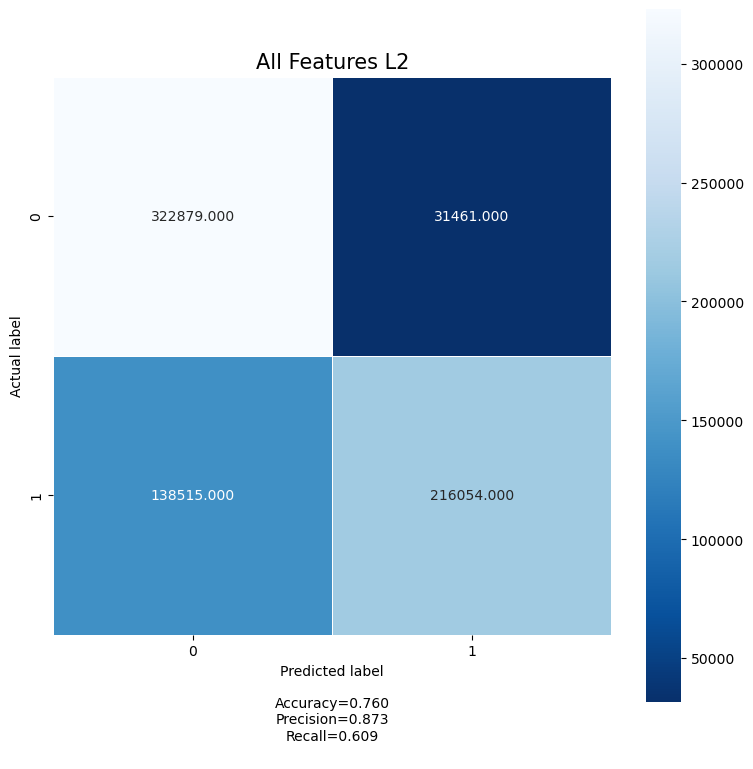

In [45]:
# All features L2
# Code for confusion matrix adapted from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# Code  for stats text adapted from https://github.com/DTrimarchi10/confusion_matrix?source=post_page-----fc31e3f30fea--------------------------------
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')


stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'All Features L2'
plt.title(all_sample_title, size = 15)

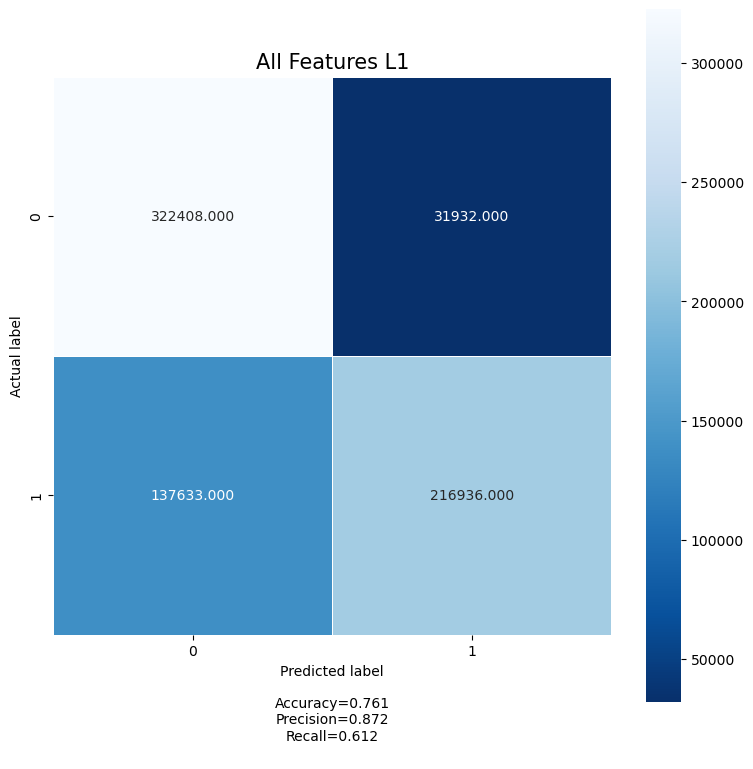

In [8]:
# All features L1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg.fit(X_train, Y_train)

Y_pred=logreg.predict(X_test)

confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)

score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'All Features L1'
plt.title(all_sample_title, size = 15)

In [9]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:", metrics.precision_score(Y_test, Y_pred)) 
print("Recall:", metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7608085099780084
Precision: 0.8716910169246348
Recall: 0.6118301374344627


In [10]:
X = data_upsampled[['stars']]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [12]:
Y_pred=logreg.predict(X_test)

In [13]:
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)

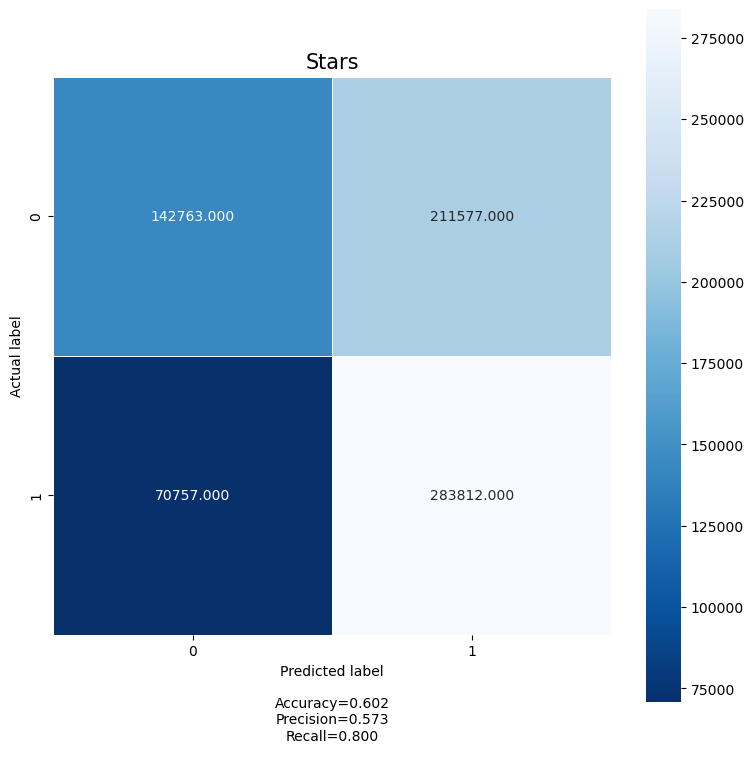

In [14]:
#Stars 
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'Stars'
plt.title(all_sample_title, size = 15)

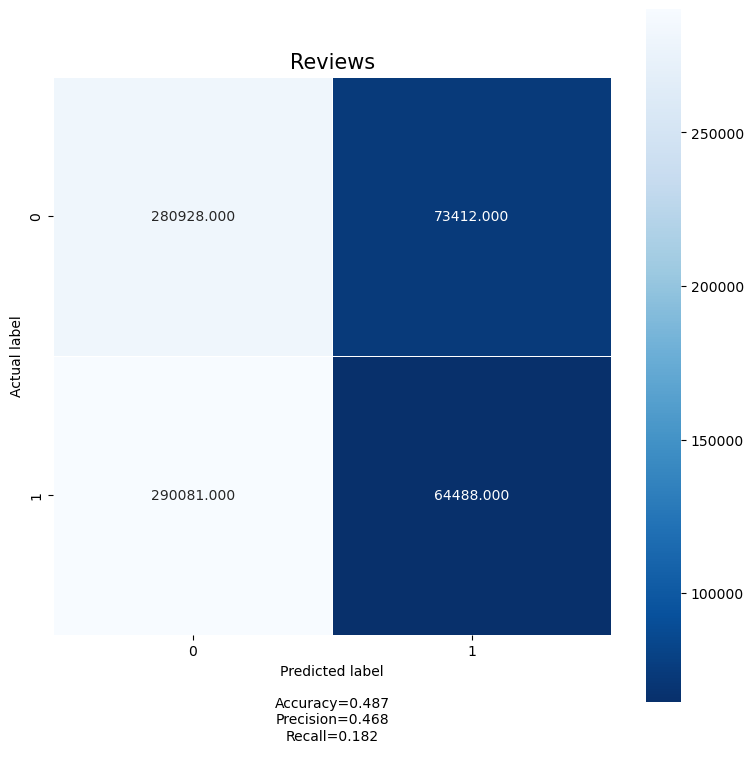

In [15]:
# Reviews
X = data_upsampled[['reviews']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'Reviews'
plt.title(all_sample_title, size = 15)

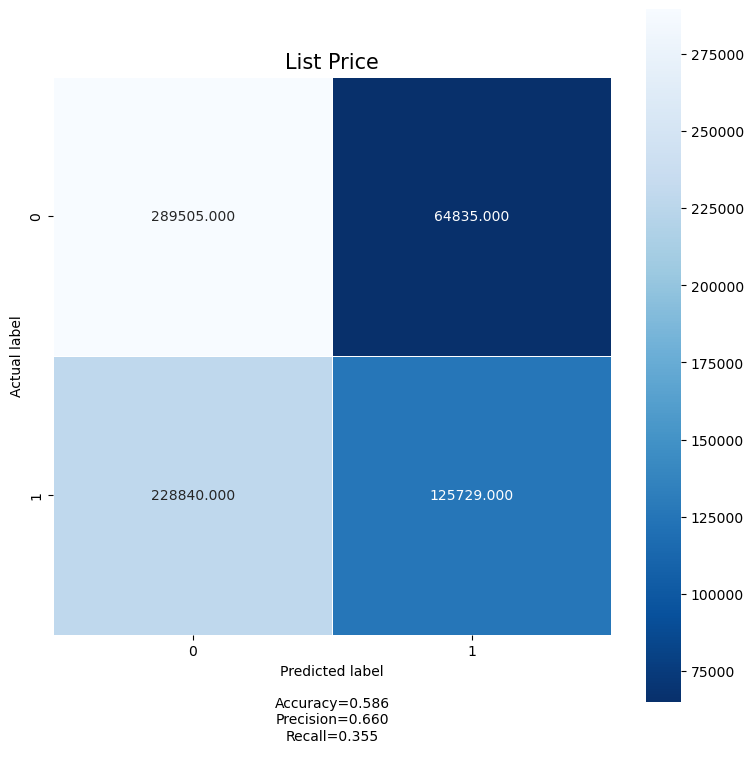

In [16]:
# List Price
X = data_upsampled[['listPrice']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'List Price'
plt.title(all_sample_title, size = 15)

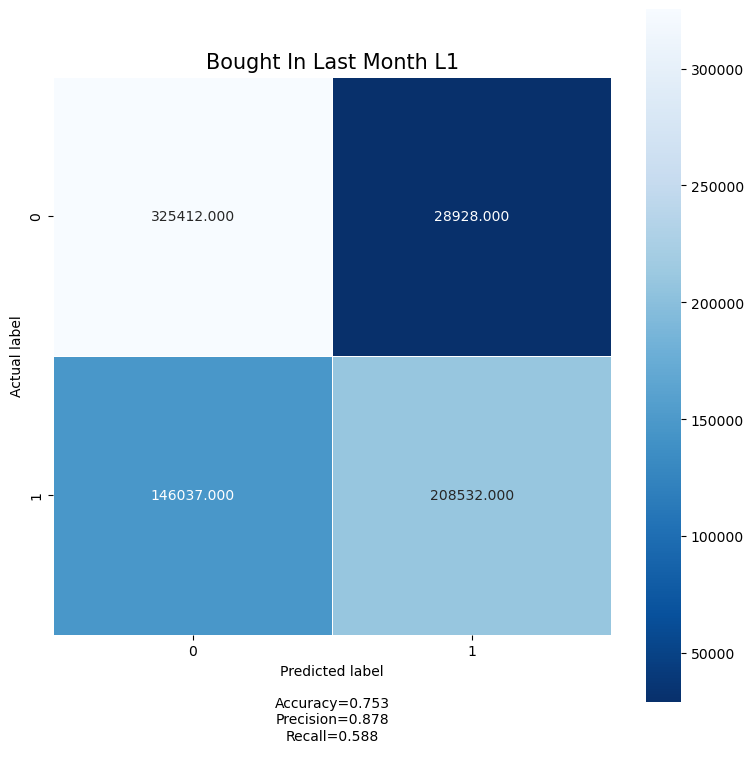

In [46]:
# Bought In Last Month L1
X = data_upsampled[['boughtInLastMonth']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'Bought In Last Month L1'
plt.title(all_sample_title, size = 15)

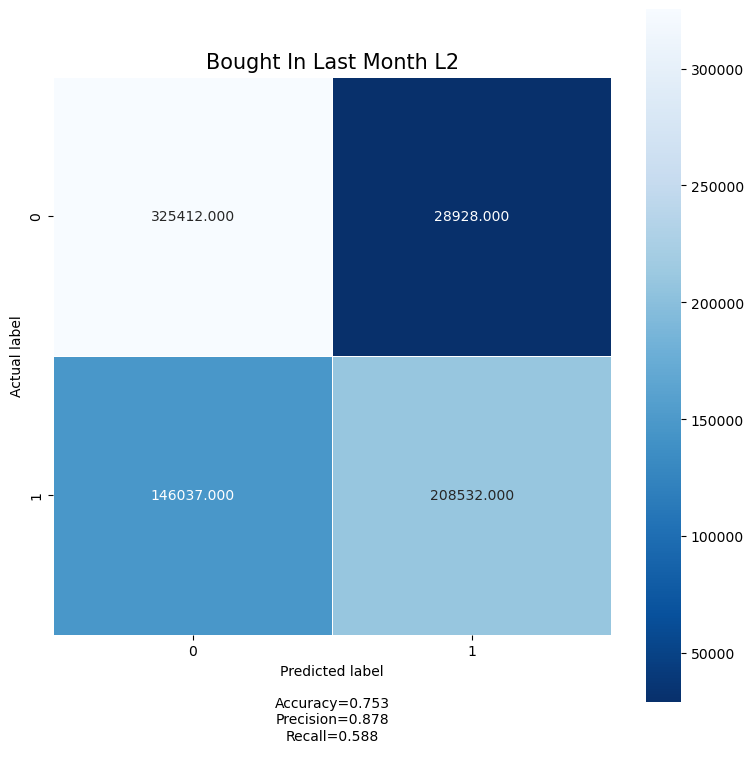

In [49]:
# Bought In Last Month L2
X = data_upsampled[['boughtInLastMonth']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'Bought In Last Month L2'
plt.title(all_sample_title, size = 15)

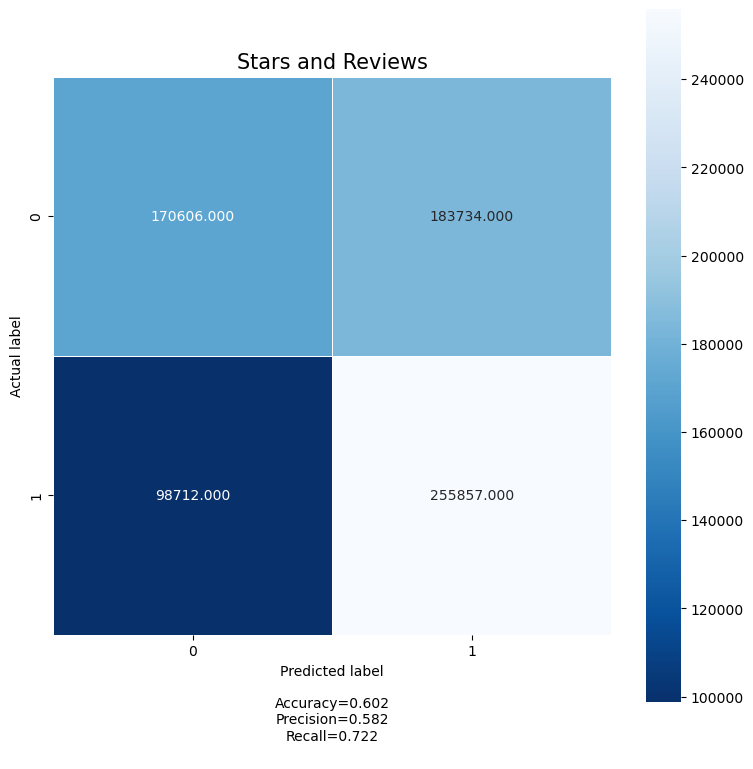

In [19]:
# Stars and Reviews L2
X = data_upsampled[['stars', 'reviews']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
confusionMatrix = metrics.confusion_matrix(Y_test, Y_pred)
score = logreg.score(X_test, Y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
plt.xlabel('Predicted label' + stats_text)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\n".format(
                metrics.accuracy_score(Y_test, Y_pred),metrics.precision_score(Y_test, Y_pred),metrics.recall_score(Y_test, Y_pred))
all_sample_title = 'Stars and Reviews'
plt.title(all_sample_title, size = 15)